In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Advertising.csv")  # Import the file

In [3]:
df.head() # Displaying the data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Remove the extra column from a dataframe or data 

In [4]:
df_clean = df.loc[:, ~df.columns.str.contains('Unnamed')] # Cleaning the data removing column 'Unnamed'

In [5]:
df_clean

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
# calculate difference in df_clean['dif'] = df_clean['tv'] - df_clean['radio'] 

# describe() method returns description of the data in the DataFrame.

### count - The number of not-empty values.
### mean - The average (mean) value.
### std - The standard deviation.
### min - the minimum value.
### 25% - The 25% percentile*.
### 50% - The 50% percentile*.
### 75% - The 75% percentile*.
### max - the maximum value.

In [7]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# HEATMAP

## It is defined as a graphical representation of data using colors to visualize the value of the matrix.

<Figure size 800x500 with 0 Axes>

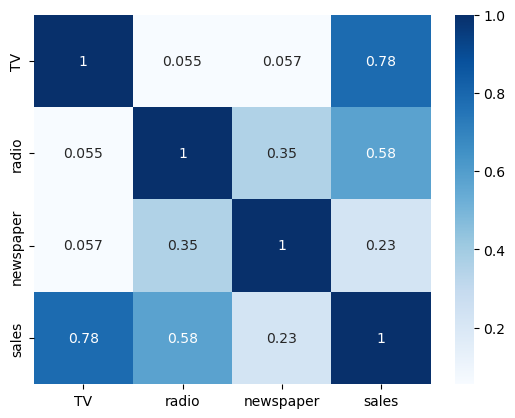

<Figure size 800x500 with 0 Axes>

In [8]:
heatmap = sns.heatmap(df_clean.corr(), annot=True, cmap="Blues")
plt.figure(figsize=(8,5))

In [9]:
labels = df_clean['sales']
features = df_clean.drop(['sales'], axis=1)
features

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


C:\Users\kdeep\AppData\Local\Temp\ipykernel_58088\4054555469.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(labels, features[x], 'ro', color = 'blue')  # arguments are passed to np.histogram


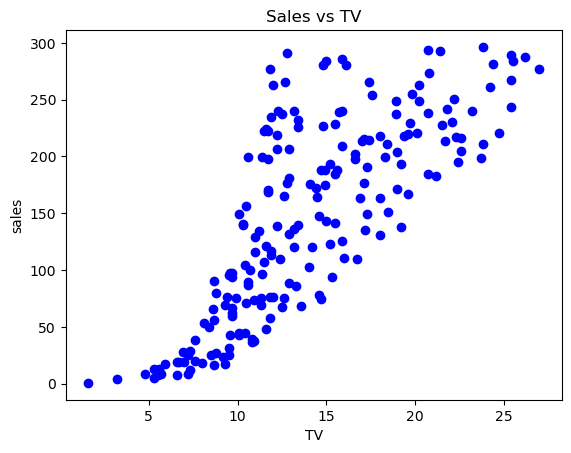

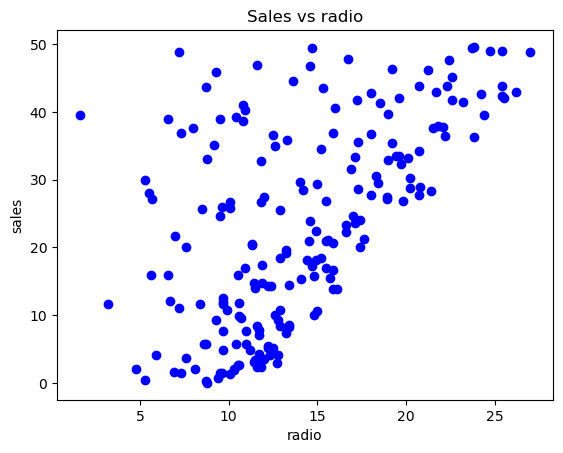

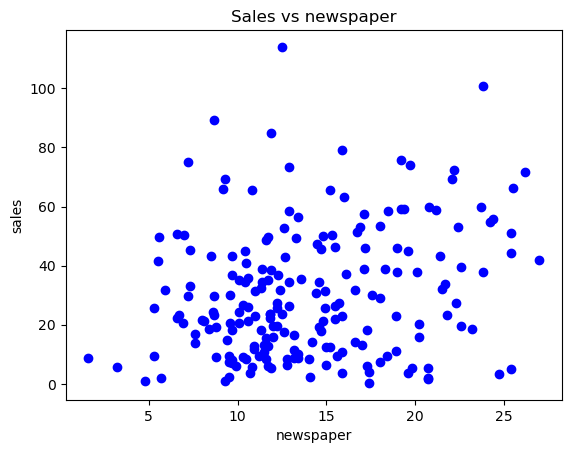

In [10]:
for x in features:
    plt.plot(labels, features[x], 'ro', color = 'blue')  # arguments are passed to np.histogram
    plt.title("Sales vs " + x)
    plt.xlabel(x)
    plt.ylabel("sales")
    plt.show()

C:\Users\kdeep\AppData\Local\Temp\ipykernel_58088\4134070868.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['newspaper'], _ = stats.boxcox(x)


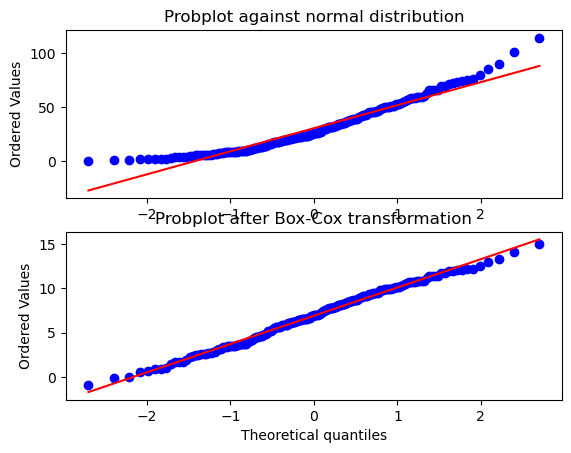

In [11]:
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df_clean['newspaper']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
# We now use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)
df_clean['newspaper'], _ = stats.boxcox(x)
prob = stats.probplot(df_clean['newspaper'], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

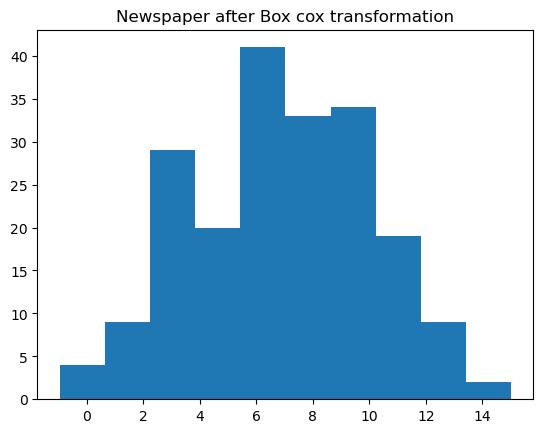

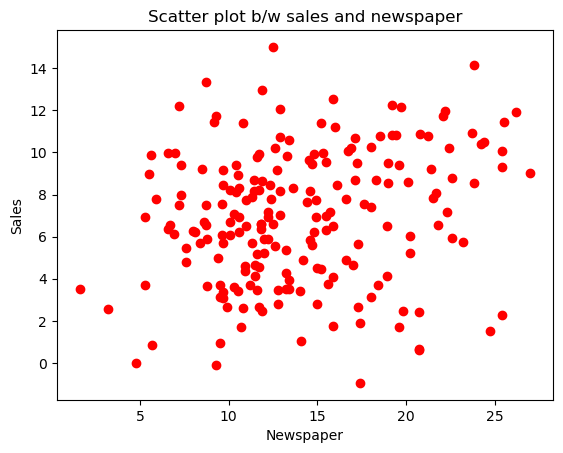

In [12]:
plt.hist(df_clean['newspaper'], bins='auto')  # arguments are passed to np.histogram
plt.title("Newspaper after Box cox transformation")
plt.show()

plt.plot(df_clean['sales'], df_clean['newspaper'], 'ro')  # arguments are passed to np.histogram
plt.title("Scatter plot b/w sales and newspaper")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [13]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df_clean).fit()
model2 = sm.ols(formula="sales~TV+radio", data=df_clean).fit()
model3 = sm.ols(formula="sales~TV", data=df_clean).fit()
#sales~TV+radio+newspaper
print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.2
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.58e-96
Time:                        12:36:06   Log-Likelihood:                -386.19
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8894      0.361      7.995      0.0

In [14]:
# p value is less than 0.05 : It shows strong evidence against null hypothesis.

In [15]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df_clean).fit()
model2 = sm.ols(formula="sales~TV+radio", data=df_clean).fit()
model3 = sm.ols(formula="sales~TV", data=df_clean).fit()
#sales~TV+radio+newspaper
print(model1.summary())
print(model2.summary())
print(model3.summary())

# From the above results it is clear that the 'model 2' with feature 'radio' and 'TV' 
# is having the lowest AIC & BIC

#Model 2 Parameters, error, and r square
print('Parameters: ', model2.params)
print('R2: ', model2.rsquared)
print('Standard errors: ', model2.bse)

#Actual and predicted values
y_pred = model2.predict()
df1 = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})  
df1.head(10)

# model accuracy check
df1.corr()
df1['Residuals'] = df1['Actual'] - df1['Predicted'] # residuals

from sklearn import metrics
print('MAE:', np.round_(metrics.mean_absolute_error(labels, y_pred), 3))
print('MSE:', np.round_(metrics.mean_squared_error(labels, y_pred), 3))
print('RMSE:', np.round_(np.sqrt(metrics.mean_squared_error(labels, y_pred)),3))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.2
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.58e-96
Time:                        12:36:06   Log-Likelihood:                -386.19
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8894      0.361      7.995      0.0